# WeRateDogs: Data Wrangling
`Author: Abah Linson Igoche`

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [344]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

## Introduction
This Data wrangling, which consists of: 
1. Gathering data
2. Assessing data
3. Cleaning data
4. Storing, analyzing, and visualizing the wrangled data

The data used for this project is from the tweeter archive of **WeRateDogs**. The twitter handle has a unique system of rating people's dogs "with a humorous comment about the dog. It was started in 2015 by college student Matt Nelson, and has received international media coverage ... for its popularity."[Wikipedia](https://en.wikipedia.org/wiki/WeRateDogs "WeRateDogs"). There is so much fun pictures of dogs at [WeRatedogs](https://twitter.com/dog_rates?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor, "WeRateDogs"), you should have a look.

## Data Gathering
As the first step in _Data Wrangling_, gather all the needed data from different sources.
1. `twitter-archive-enhanced.csv`: This file holds the tweet archive for `@WeRateDogs` and has been predownloaded from the classroom to my local machine.
2. `image-predictions.tsv`: This file will be downloaded from [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv).
3. `tweet_json.txt`: This is the extra file to be scraped from twitter.

### Packages
Import the needed packages to send a get request, read files, scrape twitter, analyze and visualize the data.

In [2]:
# scraping packages
import requests as r
import tweepy
from tweepy import OAuthHandler
# for reading files
import pandas as pd
import json
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# basic
import numpy as np
from timeit import default_timer as timer
from IPython.core.display import clear_output
pd.options.mode.chained_assignment = None

### Twitter Archive

In [3]:
# read first file
archive_df = pd.read_csv("twitter-archive-enhanced.csv")

### Image Predictions
Programmatically download the dog image prediction files from the Udacity server

In [5]:
#url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# send get request
# save file
with open('image_predictions.tsv', mode='wb') as file:
    response = r.get(url)
    file.write(response.content)
    
# read second file
prediction_df = pd.read_csv("image_predictions.tsv", sep='\t')

### Tweet Json
Query Twitter API for each tweet in the Twitter archive and save JSON in a text file.

In [12]:
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hidden'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,
                 wait_on_rate_limit=True,
                 wait_on_rate_limit_notify=True)

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive_df.tweet_id.values

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for i, tweet_id in enumerate(tweet_ids):
        print(f"{i} : {tweet_id}")
        clear_output(wait = True)
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

Success
2403.4098829432505
{888202515573088257: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 873697596434513921: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 872668790621863937: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 872261713294495745: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 869988702071779329: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 866816280283807744: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 861769973181624320: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 845459076796616705: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 842892208864923648: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 837012587749474308: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 827228250799742977: TweepError([

Read the scraped data

In [7]:
# read tweet_json
data = []
with open('tweet_json.txt') as f:
    for line in f:
       data.append(json.loads(line))

tweet_df = pd.DataFrame(data)

>I have successfully gathered the three data needed for this project and will move on to the next step of _Data Wrangling_, which happens be...

## Data Accessing

### twitter-archive-enhanced

In [10]:
archive_df_clean = archive_df.copy()
archive_df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


- timestamp isn't unique enough (Year, month, day, hour).
- dog stages (doggo, floofer, pupper, and puppo) should be values of a single variable.
- rating_numerator isn't descriptive enough.

In [12]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

There are 2356 observations and 17 columns in the dataframe.

- Retweeted status (181) not needed.
- tweet_id has datatype int64.
- timestamp is in wrong datatype

In [29]:
print(archive_df_clean.name.head())
print(sorted(archive_df_clean.name.unique())[-5:])

0     Phineas
1       Tilly
2      Archie
3       Darla
4    Franklin
Name: name, dtype: object
['such', 'the', 'this', 'unacceptable', 'very']


- The names are capitalized. Non-capitalized words aren't names.

In [42]:
archive_df_clean.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

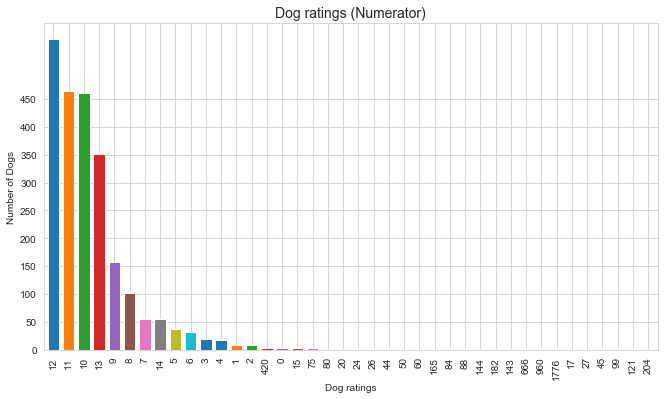

In [44]:
fig = plt.figure(1, figsize=(11, 6))
archive_df_clean.rating_numerator.value_counts().plot.bar(width=0.76)
plt.xlabel('Dog ratings')
plt.ylabel('Number of Dogs')
plt.title('Dog ratings (Numerator)', fontsize=14)
plt.yticks(range(0, 500, 50))
sns.set_style("whitegrid");

- Outliers in rating_numerator

### Image Prediction

1. tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
2. p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever
3. p1_conf is how confident the algorithm is in its #1 prediction → 95%
4. p1_dog is whether or not the #1 prediction is a breed of dog → TRUE
5. p2 is the algorithm's second most likely prediction → Labrador retriever
6. p2_conf is how confident the algorithm is in its #2 prediction → 1%
7. p2_dog is whether or not the #2 prediction is a breed of dog → TRUE

In [182]:
prediction_df_clean = prediction_df.copy()
prediction_df_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


- Dog breeds in p1, p2, and p3 contain an underscore.
- Dog breeds are in both lower and Upper cases.

In [33]:
prediction_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- tweet_id is in int64.

### Scraped Data

In [34]:
tweet_df_clean = tweet_df.copy()
tweet_df_clean.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37748,False,This is Phineas. He's a mystical boy. Only eve...,None,...,NaN,NaN,NaN,NaN,8226,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32430,False,This is Tilly. She's just checking pup on you....,None,...,NaN,NaN,NaN,NaN,6079,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24427,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,NaN,NaN,NaN,NaN,4023,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41085,False,This is Darla. She commenced a snooze mid meal...,None,...,NaN,NaN,NaN,NaN,8379,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",39281,False,This is Franklin. He would like you to stop ca...,None,...,NaN,NaN,NaN,NaN,9082,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


- There are retweets in the data frame.
- Tweet id is not properly named.

In [35]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2339 non-null object
display_text_range               2339 non-null object
entities                         2339 non-null object
extended_entities                2065 non-null object
favorite_count                   2339 non-null int64
favorited                        2339 non-null bool
full_text                        2339 non-null object
geo                              0 non-null object
id                               2339 non-null int64
id_str                           2339 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null obj

- id is of type int64

### Quality Data
 > **Define Action Points**
 1. Remove all retweeted status (181) from archive_df_clean.
 2. fix non dog names in name column.
 3. rename "id" to "tweet_id".
 4. Remove all retweets from the scraped dataframe (tweet_df_clean)
 5. Replace underscores in p1, p2, and p3 with space.
 6. Convert the values of p1, p2, and p3 to title format.
 7. Rename rating_denominator to "dog_rating"
 8. Filter out outliers in rating_numerator

### Tidy Data
> **Define Action Points**
1. Merged the dog stages (doggo, floofer, pupper, and puppo) into one column (stage). 
2. Change timestamp to datatype datetime.
3. Create unique columns from timestamp (Year, month, day, hour).
4. Change tweet_id to datatype string.
5. Select the columns of interest and merge the dataframes

## Data Cleaning

### Remove all retweeted status from archive_df_clean

Code

In [93]:
# no retweets
mask = archive_df_clean.retweeted_status_id.isnull() == True
archive_df_clean = archive_df_clean[mask]

Test

In [114]:
assert (archive_df_clean.retweeted_status_id.isnull() == True).all()

### fix non dog names in name column

Code

In [124]:
for dog_name in archive_df_clean.name:
    if dog_name.islower():
        archive_df_clean.name.replace(dog_name, 'None', inplace=True)

Test

In [140]:
assert archive_df_clean.name.str.islower().all() == False

### Rename "id" to "tweet_id"

Code

In [143]:
tweet_df_clean.rename(columns={'id':'tweet_id'}, inplace=True)

test

In [157]:
assert "id" not in tweet_df_clean.columns

### Remove all retweets from the scraped dataframe (tweet_df_clean)

Code

In [166]:
mask = tweet_df_clean.retweeted_status.isnull() == True
tweet_df_clean = tweet_df_clean[mask]

Test

In [171]:
assert tweet_df_clean.retweeted_status.isnull().all()

### Replace underscores in p1, p2, and p3 with space.

Code

In [183]:
def _Replace(text):
    """takes a text, removes '_'
    """
    return text.str.replace('_', ' ')

prediction_df_clean[['p1', 'p2', 'p3']] = prediction_df_clean[['p1', 'p2', 'p3']].apply(_Replace)

Test

In [196]:
def _Find(text):
    """checks if a string contains '_'
    """
    return text.str.contains('_')

assert prediction_df_clean[['p1', 'p2', 'p3']].apply(_Find).all().all() == False

### Convert the values of p1, p2, and p3 to title format

Code

In [197]:
def _Title(text):
    """ converts text to title
    """
    return text.str.title()
prediction_df_clean[['p1', 'p2', 'p3']] = prediction_df_clean[['p1', 'p2', 'p3']].apply(_Title)

Test

In [199]:
assert prediction_df_clean[['p1', 'p2', 'p3']].apply(_Title).all().all()

### Rename rating_denominator to "dog_rating"

Code

In [200]:
archive_df_clean.rename(columns={'rating_numerator':'dog_rating'}, inplace=True)

Test

In [201]:
assert "rating_numerator" not in tweet_df_clean.columns

### Filter out outliers in rating_numerator (now dog_rating)

Code

In [203]:
# filter data
archive_df_clean = archive_df_clean[archive_df_clean['dog_rating'] < 15]

Test

In [206]:
assert (archive_df_clean.dog_rating > 14).all() == False

### Merged the dog stages (doggo, floofer, pupper, and puppo) into one column (stage).
code

In [208]:
cols = ['doggo', 'floofer', 'pupper', 'puppo']
archive_df_clean['stage'] = archive_df_clean[cols].apply(lambda x: ''.join(x), axis=1)

Test

In [209]:
archive_df_clean.stage.unique()

array(['NoneNoneNoneNone', 'doggoNoneNoneNone', 'NoneNoneNonepuppo',
       'NoneNonepupperNone', 'NoneflooferNoneNone', 'doggoNoneNonepuppo',
       'doggoflooferNoneNone', 'doggoNonepupperNone'], dtype=object)

Make the dog stages more readable

In [211]:
new_stages = ['None', 'Doggo', 'Puppo', 'Pupper', 'Floofer',
          'Doggo, Puppo','Doggo, Floofer', 'Doggo, Pupper']

archive_df_clean.stage.replace('NoneNoneNoneNone', new_stages[0], inplace = True)
archive_df_clean.stage.replace('doggoNoneNoneNone', new_stages[1], inplace = True)
archive_df_clean.stage.replace('NoneNoneNonepuppo', new_stages[2], inplace = True)
archive_df_clean.stage.replace('NoneNonepupperNone', new_stages[3], inplace = True)
archive_df_clean.stage.replace('NoneflooferNoneNone',new_stages[4], inplace = True)
archive_df_clean.stage.replace('doggoNoneNonepuppo', new_stages[5], inplace = True)
archive_df_clean.stage.replace('doggoflooferNoneNone', new_stages[6], inplace = True)
archive_df_clean.stage.replace('doggoNonepupperNone', new_stages[7], inplace = True)

Test

In [212]:
archive_df_clean.stage.unique()

array(['None', 'Doggo', 'Puppo', 'Pupper', 'Floofer', 'Doggo, Puppo',
       'Doggo, Floofer', 'Doggo, Pupper'], dtype=object)

### Change timestamp to datatype datetime.

Code

In [215]:
# to datetime
archive_df_clean.timestamp = archive_df_clean.timestamp.astype('datetime64[ns]')

Test

In [221]:
archive_df_clean.timestamp.dtype

dtype('<M8[ns]')

### Create unique columns from timestamp (Year, month, day, hour).

Code

In [222]:
#new columns
archive_df_clean['year'] = archive_df_clean['timestamp'].dt.year
archive_df_clean['month'] = archive_df_clean['timestamp'].dt.month
archive_df_clean['day'] = archive_df_clean['timestamp'].dt.day
archive_df_clean['hour'] = archive_df_clean['timestamp'].dt.hour

Test

In [235]:
archive_df_clean.columns[-4:]

Index(['year', 'month', 'day', 'hour'], dtype='object')

### Change tweet_id to datatype string

Code

In [246]:
archive_df_clean.tweet_id = archive_df_clean.tweet_id.astype(str)
prediction_df_clean.tweet_id = prediction_df_clean.tweet_id.astype(str)
tweet_df_clean.tweet_id = tweet_df_clean.tweet_id.astype(str)

Test

In [278]:
assert archive_df_clean.tweet_id.dtype == 'O'
assert prediction_df_clean.tweet_id.dtype == 'O'
assert tweet_df_clean.tweet_id.dtype == 'O'

### Select the columns of interest and merge the dataframes

Code

In [283]:
archive_cols = ['tweet_id', 'dog_rating', 'rating_denominator',
               'name', 'year', 'month', 'day', 'hour', 'stage']
archive_df_clean2 = archive_df_clean[archive_cols]

tweet_df_clean2 = tweet_df_clean[['tweet_id', 'favorite_count', 'retweet_count']]

prediction_df_clean2 = prediction_df_clean.drop(['jpg_url', 'img_num'], axis = 1)

# merge dataframes
master_df = archive_df_clean2.merge(prediction_df_clean2,on='tweet_id').merge(tweet_df_clean2,on='tweet_id')

Test

In [285]:
master_df.head()

,tweet_id,dog_rating,rating_denominator,name,year,month,day,hour,stage,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,13,10,Phineas,2017,8,1,16,None,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,37748,8226
1,892177421306343426,13,10,Tilly,2017,8,1,0,None,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,32430,6079
2,891815181378084864,12,10,Archie,2017,7,31,0,None,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,24427,4023
3,891689557279858688,13,10,Darla,2017,7,30,15,None,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,41085,8379
4,891327558926688256,12,10,Franklin,2017,7,29,16,None,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,39281,9082


## Data Analysis and Visualization

In [286]:
# quick summary
master_df[['dog_rating', 'favorite_count', 'retweet_count']].describe()

,dog_rating,favorite_count,retweet_count
count,1972.000000,1972.000000,1972.000000
mean,10.536511,8678.666329,2630.522312
std,2.201007,12744.842744,4701.469226
min,0.000000,77.000000,11.000000
25%,10.000000,1854.500000,584.500000
50%,11.000000,3918.500000,1259.000000
75%,12.000000,10838.250000,3009.250000
max,14.000000,162985.000000,82894.000000


- 75% of dogs are rated 12 or lesser
- The median rating is 11
- Maximum favorites:162985,
- Minimum favorites: 77,
- maximum retweets: 82894,
- minimum retweets: 11,

### Dog Ratings

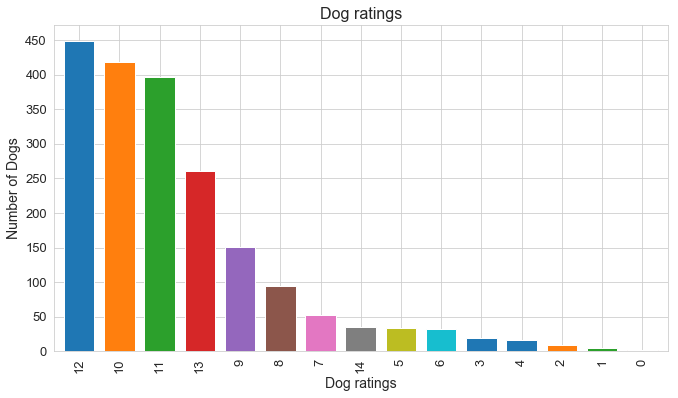

In [293]:
fig = plt.figure(1, figsize=(11, 6))
master_df.dog_rating.value_counts().plot.bar(width=0.76)
plt.xlabel('Dog ratings', fontsize=14)
plt.ylabel('Number of Dogs', fontsize=14)
plt.title('Dog ratings', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.yticks(range(0, 500, 50));

Most dogs have a rating of 12, 10, 11, and 13 - in that simple order.

### Retweets/Favorites By Rating

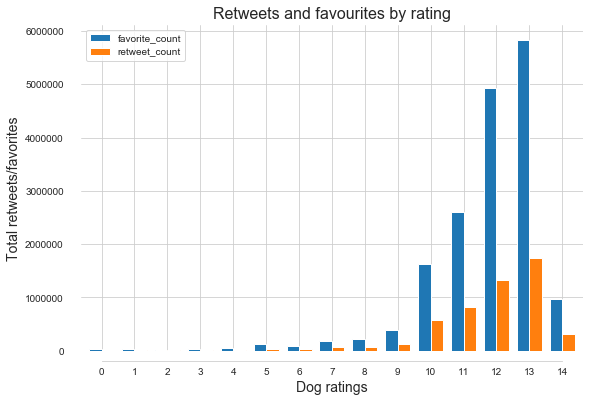

In [299]:
#group retweets and favorites by rating
favorite_tweet_count =master_df[['dog_rating', 'favorite_count', 'retweet_count']].groupby('dog_rating').sum()
favorite_tweet_count.plot.bar(figsize=(9, 6), width=0.76)
plt.xlabel('Dog ratings', fontsize=14)
plt.ylabel('Total retweets/favorites', fontsize=14)
plt.title('Retweets and favourites by rating', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sns.despine(offset=10, trim=True)
sns.despine(left=True);

The number of retweets and favorites increases as the dog rating moves from 0 to 13. And then a decline sets in at rating 14. Recall that, as seen in the previous plot, quite a few number of dogs were rated 14.

### Number of tweets by hour and day

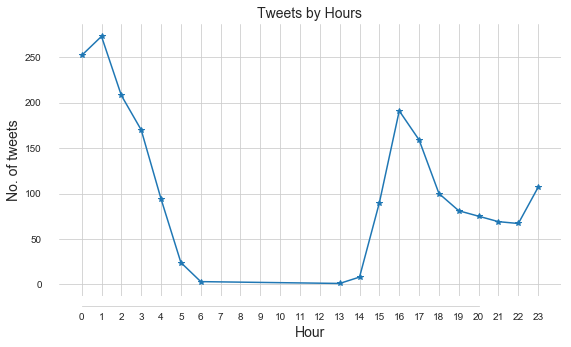

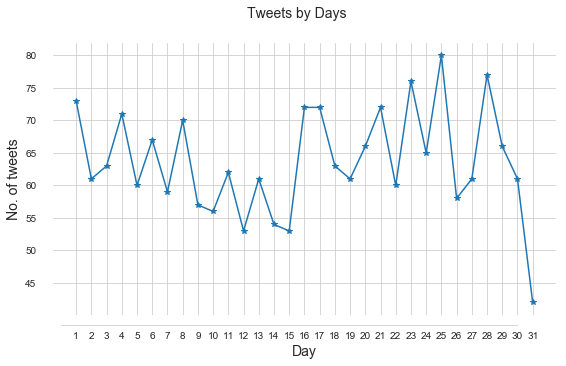

In [307]:
#tweets by hour
tweets_by_hour = master_df.groupby(['hour'])['tweet_id'].count()
#tweets by day
tweets_by_day = master_df.groupby(['day'])['tweet_id'].count()

to_plot = [tweets_by_hour, tweets_by_day]

# plot tweets by hour and day
for item in to_plot:
    fig = plt.subplots(figsize=(9, 5))
    item.plot(marker='*')
    plt.ylabel('No. of tweets', fontsize=14)
    sns.despine(offset=10, trim=True)
    sns.despine(left=True)
    if item is tweets_by_day:
        plt.xticks(range(1, 32, 1))
        plt.suptitle('Tweets by Days', fontsize=14)
        plt.xlabel('Day', fontsize=14)
    else:
        plt.xticks(range(0, 24, 1))
        plt.title('Tweets by Hours', fontsize=14)
        plt.xlabel('Hour', fontsize=14)
    plt.show()

WeRateDogs tends to tweet the most on the 25th, 28th, and 23rd days of the month. The handle also loves to tweet during early mornings and mid afternoons. The distritribution plot below puts this in a better view.

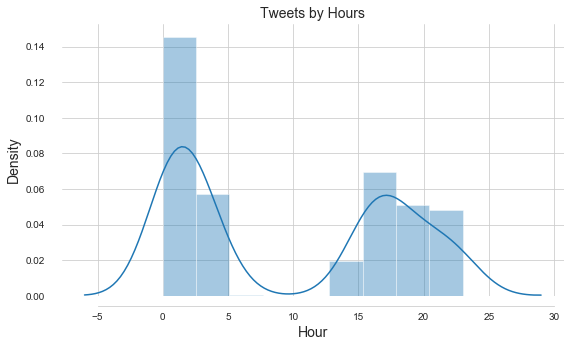

In [315]:
fig = plt.subplots(figsize=(9, 5))
sns.distplot(master_df.hour)
plt.title('Tweets by Hours', fontsize=14)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Density', fontsize=14)
sns.despine(offset=10, trim=True)
sns.despine(left=True);

### Correlation

In [317]:
master_df[['hour', 'dog_rating', 'favorite_count', 'retweet_count']].corr()

,hour,dog_rating,favorite_count,retweet_count
hour,1.000000,0.088631,0.050005,0.046524
dog_rating,0.088631,1.000000,0.381657,0.287605
favorite_count,0.050005,0.381657,1.000000,0.929549
retweet_count,0.046524,0.287605,0.929549,1.000000


There is a strong positive correlation between the number of favorites and retweets. I'd like to visualize this.

#### Retweets and favorites

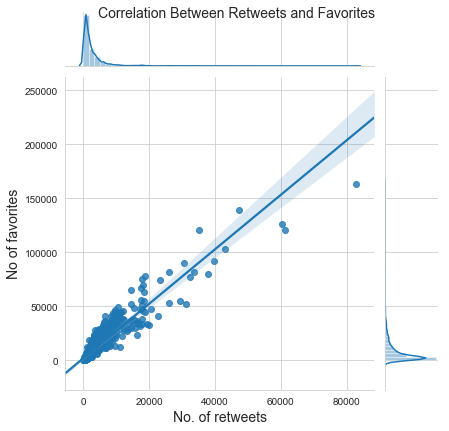

In [324]:
sns.jointplot(x="retweet_count", y="favorite_count",
              data=master_df[["retweet_count", "favorite_count"]],kind='reg')
plt.suptitle('Correlation Between Retweets and Favorites', fontsize=14)
plt.xlabel('No. of retweets', fontsize=14)
plt.ylabel('No of favorites', fontsize=14);

#### Dog stages distribution

In [325]:
master_df[['p1_conf', 'p2_conf', 'p3_conf']].describe()

,p1_conf,p2_conf,p3_conf
count,1972.000000,1.972000e+03,1.972000e+03
mean,0.593400,1.348991e-01,6.028071e-02
std,0.272002,1.007384e-01,5.082669e-02
min,0.044333,1.011300e-08,1.740170e-10
25%,0.360361,5.429525e-02,1.616933e-02
50%,0.587440,1.186345e-01,4.950530e-02
75%,0.843827,1.955618e-01,9.174633e-02
max,1.000000,4.880140e-01,2.710420e-01


The Neutral Network used in prediction the dogs has a better confidence level during the first prediction. So, I will use the confidence level during the first prediction to visualize if the prediction was right or wrong for each dog stage.

##### Rating vs Stage\Prediction

In [333]:
violin_plot = master_df[master_df.stage.isin(['Doggo', 'Puppo', 'Pupper', 'Floofer'])]

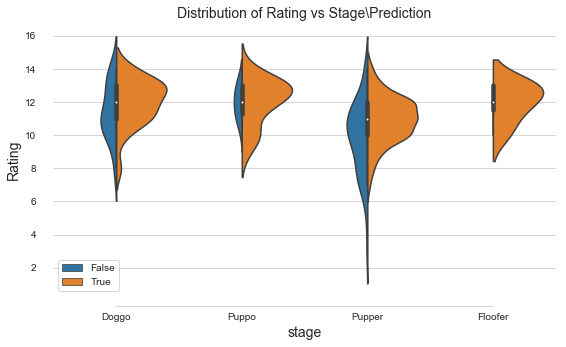

In [340]:
fig = plt.subplots(figsize=(9, 5))
sns.violinplot(x="stage", y='dog_rating', hue="p1_dog", data=violin_plot, split=True,  scale="count")
plt.title('Distribution of Rating vs Stage\Prediction', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xlabel('stage', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc=3)
sns.despine(offset=10, trim=True)
sns.despine(left=True)

The model did a good job at predicting floofers (not even a single fail) and puppos. It had more fails in prediction with puppers and doggos. Puppper dogs had lesser median rating (11) than other dogs (12), but that is nothing to worry about since the median rating for all stages of dogs is 11.

## Insights
1. The median rating for dogs is 11.
2. Maximum favorites is 162985.
3. Minimum favorites is 77.
4. maximum retweets is 82894.
5. minimum retweets is 11.
6. 75% of the dogs were rated 12 or lesser.
7. Dogs with higher rating tend to have more favorites and retweets.
8. WeRateDogs tends to tweet the most on the 25, 28, and 23 days of the month.
9. WeRateDogs also tweets the most during early mornings and mid-afternoons.
10. There is a strong positive correlation between the number of favorites and retweets. The more favorites a tweet gets, the number of retweets also increases.
11. The nuetral network used to predict the dogs did the best during the first prediction.
12. All floofers were predicted correctly.
13. Puppper dogs had lesser median rating (11) compared to other dogs (12)

In [345]:
#save master file
master_df.to_csv('twitter_archive_master.csv', index=False)